In [2]:
from bagpy import bagreader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#get all bag files in the directory and order them
import glob
files = glob.glob("./data/*.bag")
files.sort()

print(files)

#dont do the last bag files
files = files[:-1]

b = [bagreader(file) for file in files]


['./data/2024-06-28-14-47-53.bag', './data/2024-06-28-14-50-26.bag', './data/2024-06-28-14-52-40.bag', './data/2024-06-28-14-54-52.bag', './data/2024-06-28-14-57-06.bag', './data/2024-07-12-15-28-46_10lb_weight_drop.bag']
[INFO]  Successfully created the data folder ./data/2024-06-28-14-47-53.
[INFO]  Successfully created the data folder ./data/2024-06-28-14-50-26.
[INFO]  Successfully created the data folder ./data/2024-06-28-14-52-40.
[INFO]  Successfully created the data folder ./data/2024-06-28-14-54-52.
[INFO]  Successfully created the data folder ./data/2024-06-28-14-57-06.


# Decode data to pd dataframe

In [3]:
control_data_csv = [b[i].message_by_topic('/baloo/left_arm/joint_controller') for i in range(len(b))]
control_data = [pd.read_csv(control_data_csv[i]) for i in range(len(b))]
control_data[0].tail()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,generalized_coordinates,numberRBFs,RBFmin_0,RBFmin_1,RBFmin_2,...,theta_hat_62,theta_hat_63,theta_hat_64,theta_hat_65,command_0,command_1,command_2,command_3,command_4,command_5
59992,1.719608e+09,59994,1719607797,802613973,left_arm,6,10,-1.0,-1.0,-1.0,...,32.303130,14.962433,1.148420,-7.992840,34.921540,35.815867,32.331233,15.097032,1.293176,-8.390153
59993,1.719608e+09,59995,1719607797,804637670,left_arm,6,10,-1.0,-1.0,-1.0,...,32.303669,14.963857,1.152209,-7.998267,34.921613,35.815950,32.332790,15.100826,1.296614,-8.395602
59994,1.719608e+09,59996,1719607797,806491613,left_arm,6,10,-1.0,-1.0,-1.0,...,32.304190,14.965286,1.155986,-8.003699,34.924329,35.815452,32.331675,15.102734,1.299307,-8.401359
59995,1.719608e+09,59997,1719607797,808509588,left_arm,6,10,-1.0,-1.0,-1.0,...,32.304686,14.966693,1.159778,-8.009135,34.927542,35.817782,32.330188,15.102275,1.304271,-8.407047
59996,1.719608e+09,59998,1719607797,810458421,left_arm,6,10,-1.0,-1.0,-1.0,...,32.305188,14.968115,1.163557,-8.014581,34.928877,35.817622,32.330997,15.105005,1.306999,-8.413213


In [4]:
#print out data for this trial
print(f"Number RBFs: {control_data[0]['numberRBFs'][0]}")
print(f"Time constant: {control_data[0]['time_constant_0'][0]}")
print(f"zeta: {control_data[0]['zeta_0'][0]}")
print(f"Lambda0: {control_data[0]['Lambda_0'][0]}")
print(f"Lambda1: {control_data[0]['Lambda_1'][0]}")
print(f"Lambda2: {control_data[0]['Lambda_2'][0]}")
print(f"Lambda3: {control_data[0]['Lambda_3'][0]}")
print(f"Lambda4: {control_data[0]['Lambda_4'][0]}")
print(f"Lambda5: {control_data[0]['Lambda_5'][0]}")
print(f"Gamma 0: {control_data[0]['Gamma_0'][0]}")
print(f"Gamma 1: {control_data[0]['Gamma_1'][0]}")
print(f"Gamma 2: {control_data[0]['Gamma_2'][0]}")
print(f"Gamma 3: {control_data[0]['Gamma_3'][0]}")
print(f"Gamma 4: {control_data[0]['Gamma_4'][0]}")
print(f"Gamma 5: {control_data[0]['Gamma_5'][0]}")
print(f"Gamma 6: {control_data[0]['Gamma_6'][0]}")
print(f"Gamma 7: {control_data[0]['Gamma_7'][0]}")
print(f"Gamma 8: {control_data[0]['Gamma_8'][0]}")
print(f"Gamma 9: {control_data[0]['Gamma_9'][0]}")

print(f"Kd 0: {control_data[0]['KD_0'][0]}")
print(f"Kd 1: {control_data[0]['KD_1'][0]}")
print(f"Kd 2: {control_data[0]['KD_2'][0]}")
print(f"Kd 3: {control_data[0]['KD_3'][0]}")
print(f"Kd 4: {control_data[0]['KD_4'][0]}")
print(f"Kd 5: {control_data[0]['KD_5'][0]}")


Number RBFs: 10
Time constant: 0.75
zeta: 1.0
Lambda0: 12.0
Lambda1: 12.0
Lambda2: 12.0
Lambda3: 12.0
Lambda4: 25.0
Lambda5: 25.0
Gamma 0: 15.0
Gamma 1: 15.0
Gamma 2: 15.0
Gamma 3: 15.0
Gamma 4: 15.0
Gamma 5: 15.0
Gamma 6: 15.0
Gamma 7: 15.0
Gamma 8: 15.0
Gamma 9: 15.0
Kd 0: 2.5
Kd 1: 2.5
Kd 2: 2.5
Kd 3: 2.5
Kd 4: 2.5
Kd 5: 2.5


# Get data out of each frame

In [5]:
time = [control_data[i]['header.stamp.secs'] + control_data[i]['header.stamp.nsecs'] * 1e-9 for i in range(len(b))]
time = [time[i] - time[i][0] for i in range(len(b))]


#find minimum index at which time is greater thatn 120 seconds and clip all data to that length
min_index = np.min([np.where(time[i] > 119.996)[0][0] for i in range(len(b))])

time = [time[i][:min_index] for i in range(len(b))]


joint0_ucmd = [control_data[i]['q_cmd_0'][:min_index] for i in range(len(b))]
joint0_vcmd = [control_data[i]['q_cmd_1'][:min_index] for i in range(len(b))]
joint1_ucmd = [control_data[i]['q_cmd_2'][:min_index] for i in range(len(b))]
joint1_vcmd = [control_data[i]['q_cmd_3'][:min_index] for i in range(len(b))]
joint2_ucmd = [control_data[i]['q_cmd_4'][:min_index] for i in range(len(b))]
joint2_vcmd = [control_data[i]['q_cmd_5'][:min_index] for i in range(len(b))]

joint0_u = [control_data[i]['q_0'][:min_index] for i in range(len(b))]
joint0_v = [control_data[i]['q_1'][:min_index] for i in range(len(b))]
joint1_u = [control_data[i]['q_2'][:min_index] for i in range(len(b))]
joint1_v = [control_data[i]['q_3'][:min_index] for i in range(len(b))]
joint2_u = [control_data[i]['q_4'][:min_index] for i in range(len(b))]
joint2_v = [control_data[i]['q_5'][:min_index] for i in range(len(b))]

joint0_udes = [control_data[i]['q_des_0'][:min_index] for i in range(len(b))]
joint0_vdes = [control_data[i]['q_des_1'][:min_index] for i in range(len(b))]
joint1_udes = [control_data[i]['q_des_2'][:min_index] for i in range(len(b))]
joint1_vdes = [control_data[i]['q_des_3'][:min_index] for i in range(len(b))]
joint2_udes = [control_data[i]['q_des_4'][:min_index] for i in range(len(b))]
joint2_vdes = [control_data[i]['q_des_5'][:min_index] for i in range(len(b))]

s0 = [control_data[i]['s_0'][:min_index] for i in range(len(b))]
s1 = [control_data[i]['s_1'][:min_index] for i in range(len(b))]
s2 = [control_data[i]['s_2'][:min_index] for i in range(len(b))]
s3 = [control_data[i]['s_3'][:min_index] for i in range(len(b))]
s4 = [control_data[i]['s_4'][:min_index] for i in range(len(b))]
s5 = [control_data[i]['s_5'][:min_index] for i in range(len(b))]

s0_df = pd.concat(s0, axis=1)
s0_df.columns = range(len(b))

s1_df = pd.concat(s1, axis=1)
s1_df.columns = range(len(b))

s2_df = pd.concat(s2, axis=1)
s2_df.columns = range(len(b))

s3_df = pd.concat(s3, axis=1)
s3_df.columns = range(len(b))

s4_df = pd.concat(s4, axis=1)
s4_df.columns = range(len(b))

s5_df = pd.concat(s5, axis=1)
s5_df.columns = range(len(b))

s5_df.head()

,0,1,2,3,4
0,4.734255,4.747617,4.666844,4.761485,4.849056
1,4.735073,4.747573,4.664083,4.761849,4.849012
2,4.734319,4.745583,4.662177,4.762066,4.847343
3,4.732649,4.743138,4.660804,4.760427,4.846668
4,4.730567,4.740777,4.659575,4.760866,4.843569


In [6]:
#confidence intervals for s values over each degree of freedom
s0_df['Mean'] = s0_df.iloc[:,1:6].mean(axis=1)
s1_df['Mean'] = s1_df.iloc[:,1:6].mean(axis=1)
s2_df['Mean'] = s2_df.iloc[:,1:6].mean(axis=1)
s3_df['Mean'] = s3_df.iloc[:,1:6].mean(axis=1)
s4_df['Mean'] = s4_df.iloc[:,1:6].mean(axis=1)
s5_df['Mean'] = s5_df.iloc[:,1:6].mean(axis=1)

s0_df["std"] = s0_df.iloc[:,1:6].std(axis=1, ddof=1)
s1_df["std"] = s1_df.iloc[:,1:6].std(axis=1, ddof=1)
s2_df["std"] = s2_df.iloc[:,1:6].std(axis=1, ddof=1)
s3_df["std"] = s3_df.iloc[:,1:6].std(axis=1, ddof=1)
s4_df["std"] = s4_df.iloc[:,1:6].std(axis=1, ddof=1)
s5_df["std"] = s5_df.iloc[:,1:6].std(axis=1, ddof=1)

# standard errors
s0_df["se"] = s0_df["std"] / np.sqrt(len(b))
s1_df["se"] = s1_df["std"] / np.sqrt(len(b))
s2_df["se"] = s2_df["std"] / np.sqrt(len(b))
s3_df["se"] = s3_df["std"] / np.sqrt(len(b))
s4_df["se"] = s4_df["std"] / np.sqrt(len(b))
s5_df["se"] = s5_df["std"] / np.sqrt(len(b))

#t value for 95 % confidence interval
from scipy.stats import t
confidence = 0.99
alpha = 1 - confidence
n = len(b)
dof = n - 1
t_crit = t.ppf(1 - alpha/2, dof)

# #margin of error
s0_df["me"] = t_crit * s0_df["se"]
s1_df["me"] = t_crit * s1_df["se"]
s2_df["me"] = t_crit * s2_df["se"]
s3_df["me"] = t_crit * s3_df["se"]
s4_df["me"] = t_crit * s4_df["se"]
s5_df["me"] = t_crit * s5_df["se"]

# #confidence intervals
s0_df["ci_low"] = s0_df["Mean"] - s0_df["me"]
s0_df["ci_high"] = s0_df["Mean"] + s0_df["me"]

s1_df["ci_low"] = s1_df["Mean"] - s1_df["me"]
s1_df["ci_high"] = s1_df["Mean"] + s1_df["me"]

s2_df["ci_low"] = s2_df["Mean"] - s2_df["me"]
s2_df["ci_high"] = s2_df["Mean"] + s2_df["me"]

s3_df["ci_low"] = s3_df["Mean"] - s3_df["me"]
s3_df["ci_high"] = s3_df["Mean"] + s3_df["me"]

s4_df["ci_low"] = s4_df["Mean"] - s4_df["me"]
s4_df["ci_high"] = s4_df["Mean"] + s4_df["me"]

s5_df["ci_low"] = s5_df["Mean"] - s5_df["me"]
s5_df["ci_high"] = s5_df["Mean"] + s5_df["me"]

s0_df.head()


,0,1,2,3,4,Mean,std,se,me,ci_low,ci_high
0,-4.221662,-4.200042,-4.168232,-4.093815,-4.116342,-4.144608,0.041863,0.018722,0.086196,-4.230803,-4.058412
1,-4.221162,-4.199890,-4.168499,-4.093845,-4.116371,-4.144651,0.041836,0.018710,0.086141,-4.230793,-4.058510
2,-4.223096,-4.202462,-4.170894,-4.096166,-4.118449,-4.146993,0.041971,0.018770,0.086418,-4.233411,-4.060575
3,-4.225691,-4.205242,-4.173976,-4.099154,-4.120880,-4.149813,0.042011,0.018788,0.086501,-4.236314,-4.063312
4,-4.228591,-4.208506,-4.176724,-4.101273,-4.123024,-4.152382,0.042475,0.018995,0.087456,-4.239838,-4.064925


# Plots

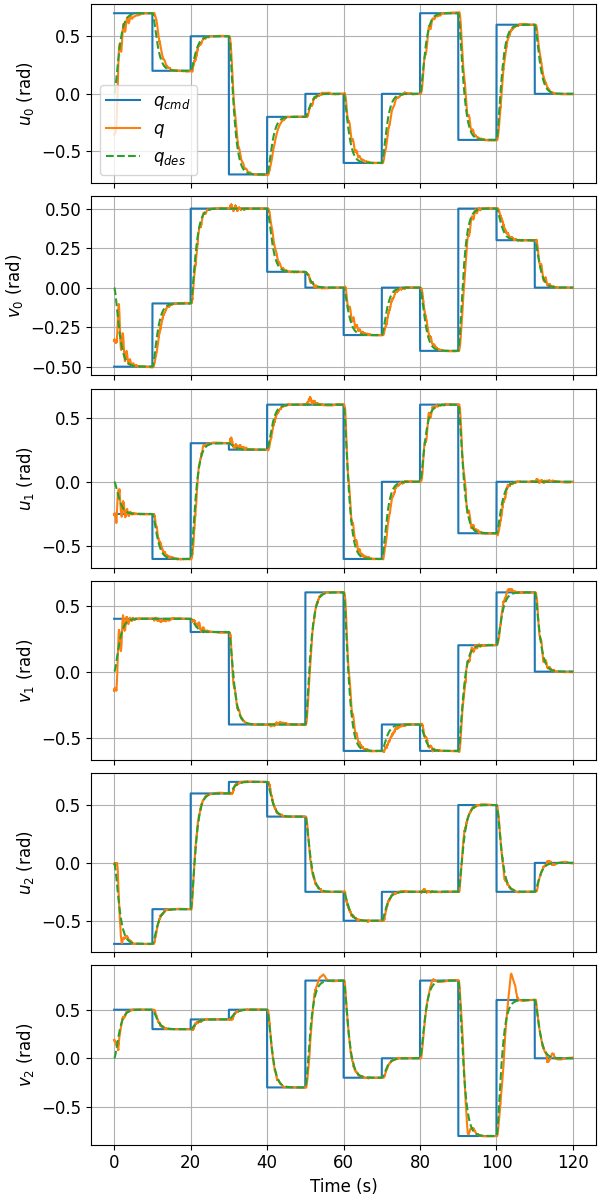

In [28]:
%matplotlib widget
plt.close('all')
fig, ax = plt.subplots(6,1,sharex=True, figsize=(6,12), constrained_layout=True)

#make text font bigger
plt.rcParams.update({'font.size': 12})

#plot joint 0 command, desired, actual (dashed), u on the left, v on the right
ax[0].plot(time[0], joint0_ucmd[0], label='$q_{cmd}$')
ax[0].plot(time[0], joint0_u[0],label='$q$')
ax[0].plot(time[0], joint0_udes[0], '--', label='$q_{des}$')
ax[0].grid()
ax[0].set_ylabel('$u_0$ (rad)')
ax[0].legend(loc='lower left')

ax[1].plot(time[0], joint0_vcmd[0],label='command')
ax[1].plot(time[0], joint0_v[0], label='actual')
ax[1].plot(time[0], joint0_vdes[0], '--', label='desired')
ax[1].grid()
ax[1].set_ylabel('$v_0$ (rad)')

#plot joint 1 command, desired, actual (dashed), u on the left, v on the right
ax[2].plot(time[0], joint1_ucmd[0],label='command')
ax[2].plot(time[0], joint1_u[0], label='actual')
ax[2].plot(time[0], joint1_udes[0], '--', label='desired')
ax[2].grid()
ax[2].set_ylabel('$u_1$ (rad)')

ax[3].plot(time[0], joint1_vcmd[0],label='command')
ax[3].plot(time[0], joint1_v[0], label='actual')
ax[3].plot(time[0], joint1_vdes[0],  '--', label='desired')
ax[3].grid()
ax[3].set_ylabel('$v_1$ (rad)')

#plot joint 2 command, desired, actual (dashed), u on the left, v on the right
ax[4].plot(time[0], joint2_ucmd[0], label='command')
ax[4].plot(time[0], joint2_u[0],  label='actual')
ax[4].plot(time[0], joint2_udes[0],  '--',label='desired')
ax[4].grid()
ax[4].set_ylabel('$u_2$ (rad)')

ax[5].plot(time[0], joint2_vcmd[0], label='command')
ax[5].plot(time[0], joint2_v[0], label='actual')
ax[5].plot(time[0], joint2_vdes[0], '--', label='desired')
ax[5].grid()
ax[5].set_ylabel('$v_2$ (rad)')
ax[5].set_xlabel('Time (s)')

plt.savefig('mrac_performance.png', dpi=300)
plt.show()



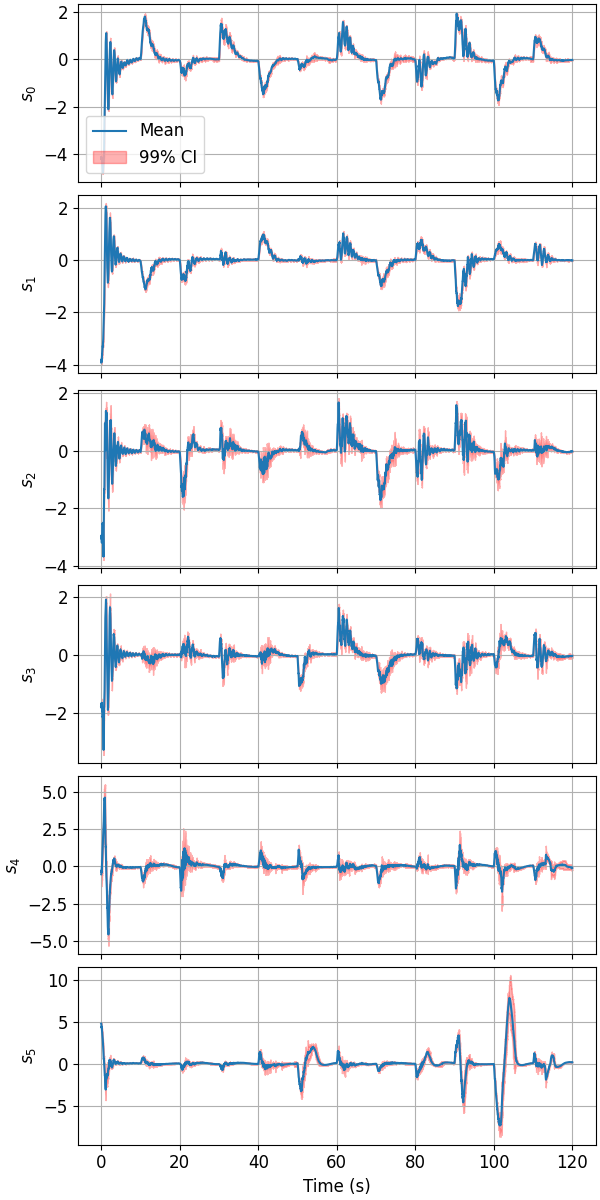

In [14]:
#plot s values with confidence intervals shaded above and below
%matplotlib widget
plt.close('all')
fig, ax = plt.subplots(6,1,sharex=True, figsize=(6,12), constrained_layout=True)

#make text font bigger
plt.rcParams.update({'font.size': 12})

#plot joint 0 s values
ax[0].plot(time[0], s0_df['Mean'], label='Mean')
ax[0].fill_between(time[0], s0_df['ci_low'], s0_df['ci_high'], color='r', alpha=0.3, label='99% CI')
ax[0].grid()
ax[0].set_ylabel('$s_0$')
ax[0].legend(loc='lower left')

#plot joint 1 s values
ax[1].plot(time[0], s1_df['Mean'], label='Mean')
ax[1].fill_between(time[0], s1_df['ci_low'], s1_df['ci_high'], color='r', alpha=0.3)
ax[1].grid()
ax[1].set_ylabel('$s_1$')

#plot joint 2 s values
ax[2].plot(time[0], s2_df['Mean'], label='Mean')
ax[2].fill_between(time[0], s2_df['ci_low'], s2_df['ci_high'], color='r', alpha=0.3)
ax[2].grid()
ax[2].set_ylabel('$s_2$')

#plot joint 3 s values
ax[3].plot(time[0], s3_df['Mean'], label='Mean')
ax[3].fill_between(time[0], s3_df['ci_low'], s3_df['ci_high'], color='r', alpha=0.3)
ax[3].grid()
ax[3].set_ylabel('$s_3$')

#plot joint 4 s values
ax[4].plot(time[0], s4_df['Mean'], label='Mean')
ax[4].fill_between(time[0], s4_df['ci_low'], s4_df['ci_high'], color='r', alpha=0.3)
ax[4].grid()
ax[4].set_ylabel('$s_4$')

#plot joint 5 s values
ax[5].plot(time[0], s5_df['Mean'], label='Mean')
ax[5].fill_between(time[0], s5_df['ci_low'], s5_df['ci_high'], color='r', alpha=0.3)
ax[5].grid()
ax[5].set_ylabel('$s_5$')

ax[5].set_xlabel('Time (s)')


plt.savefig('tracking_error_CI.png', dpi=300)
plt.show()



# Adaptation Parameters

In [15]:
#adaptation parameters for just one trial
theta_hat = [] 
for i in range((10+1)*6):
    theta_hat.append(control_data[0]['theta_hat_'+str(i)][:min_index])


In [16]:
theta_hat = np.array(theta_hat)
print(theta_hat.shape)

(66, 59993)


(59993, 6, 11)


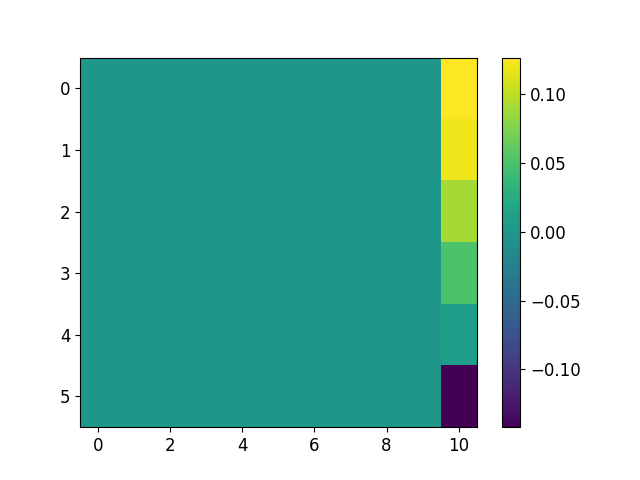

In [17]:
#need to turn reshape in M+1, n, TIME
M = 10
n = 6
theta_hatT = theta_hat.reshape(M+1,n,-1).T
print(theta_hatT.shape)


#save all heatmaps to images
plt.figure()

plt.imshow(theta_hatT[0,:,:], aspect='auto')
#add colorbar
plt.colorbar()


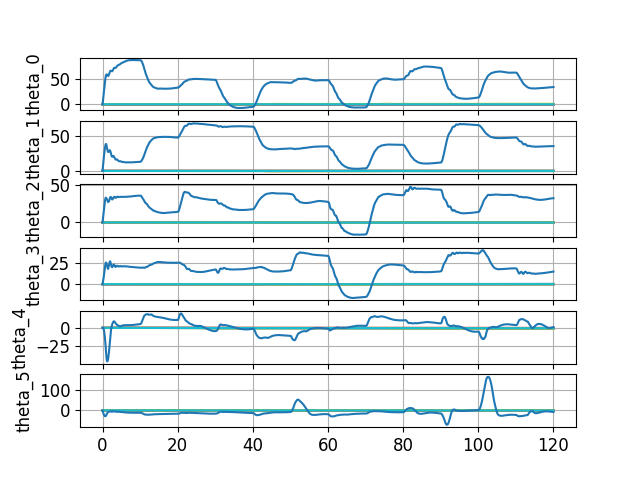

In [18]:
fig, axs = plt.subplots(6, 1, sharex=True)
for i in range(6):
    for j in range(M+1):
        axs[i].plot(time[0], theta_hatT[:, i, j], label=f"theta_hat_{j}")
    axs[i].set_ylabel(f"theta_{i}")
    axs[i].grid()
    # axs[i].set_yscale('symlog')

# Now data for dropping weight off in the middle of experiment


In [20]:
drop_b = bagreader("./data/2024-07-12-15-28-46_10lb_weight_drop.bag")

[INFO]  Successfully created the data folder ./data/2024-07-12-15-28-46_10lb_weight_drop.


In [21]:
drop_b.topic_table

,Topics,Types,Message Count,Frequency
0,/baloo/elevator_height,sensor_msgs/JointState,1283,10.006415
1,/baloo/left_arm/joint_0/angle_state,sensor_msgs/JointState,64059,499.857466
2,/baloo/left_arm/joint_0/pressure_command,rad_msgs/PressureStamped,59985,500.453884
3,/baloo/left_arm/joint_0/pressure_state,rad_msgs/PressureStamped,64113,500.095863
4,/baloo/left_arm/joint_1/angle_state,sensor_msgs/JointState,64061,500.394178
5,/baloo/left_arm/joint_1/pressure_command,rad_msgs/PressureStamped,59976,500.573338
6,/baloo/left_arm/joint_1/pressure_state,rad_msgs/PressureStamped,64113,500.095863
7,/baloo/left_arm/joint_2/angle_state,sensor_msgs/JointState,64052,500.633087
8,/baloo/left_arm/joint_2/pressure_command,rad_msgs/PressureStamped,59982,500.513604
9,/baloo/left_arm/joint_2/pressure_state,rad_msgs/PressureStamped,64112,500.095863


In [22]:
drop_data_csv = drop_b.message_by_topic('/baloo/left_arm/joint_controller')

drop_data = pd.read_csv(drop_data_csv)

In [23]:
drop_time = drop_data['header.stamp.secs'] + drop_data['header.stamp.nsecs'] * 1e-9
drop_time = drop_time - drop_time[0]


#find minimum index at which time is greater thatn 120 seconds and clip all data to that length
drop_min_index = np.min(np.where(drop_time > 119.996)[0][0])

drop_time = drop_time[:drop_min_index]

In [24]:
drop_joint0_ucmd = drop_data['q_cmd_0'][:drop_min_index]
drop_joint0_vcmd = drop_data['q_cmd_1'][:drop_min_index]
drop_joint1_ucmd = drop_data['q_cmd_2'][:drop_min_index]
drop_joint1_vcmd = drop_data['q_cmd_3'][:drop_min_index]
drop_joint2_ucmd = drop_data['q_cmd_4'][:drop_min_index]
drop_joint2_vcmd = drop_data['q_cmd_5'][:drop_min_index]

drop_joint0_u = drop_data['q_0'][:drop_min_index]
drop_joint0_v = drop_data['q_1'][:drop_min_index]
drop_joint1_u = drop_data['q_2'][:drop_min_index]
drop_joint1_v = drop_data['q_3'][:drop_min_index]
drop_joint2_u = drop_data['q_4'][:drop_min_index]
drop_joint2_v = drop_data['q_5'][:drop_min_index]

drop_joint0_udes = drop_data['q_des_0'][:drop_min_index]
drop_joint0_vdes = drop_data['q_des_1'][:drop_min_index]
drop_joint1_udes = drop_data['q_des_2'][:drop_min_index]
drop_joint1_vdes = drop_data['q_des_3'][:drop_min_index]
drop_joint2_udes = drop_data['q_des_4'][:drop_min_index]
drop_joint2_vdes = drop_data['q_des_5'][:drop_min_index]

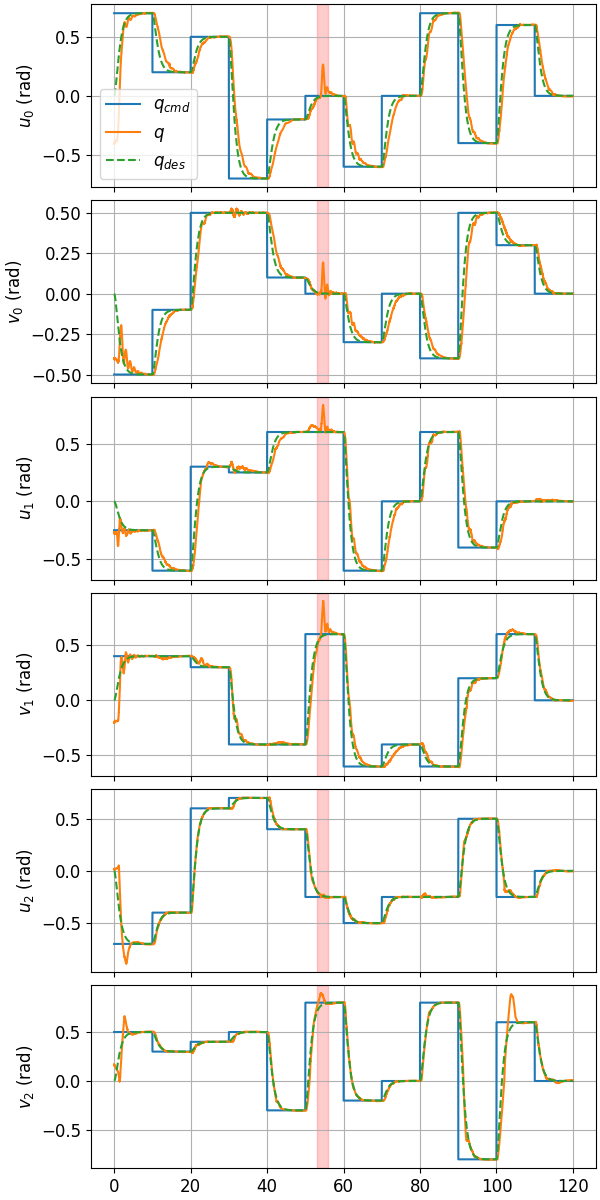

In [29]:
%matplotlib widget
plt.close('all')
fig, ax = plt.subplots(6,1,sharex=True, figsize=(6,12), constrained_layout=True)

#make text font bigger
plt.rcParams.update({'font.size': 12})

#shade between x = 54 and x=56 
for i in range(6):
    ax[i].axvspan(53, 56, color='red', alpha=0.2)

#plot joint 0 command, desired, actual (dashed), u on the left, v on the right
ax[0].plot(drop_time, drop_joint0_ucmd, label='$q_{cmd}$')
ax[0].plot(drop_time, drop_joint0_u,label='$q$')
ax[0].plot(drop_time, drop_joint0_udes, '--', label='$q_{des}$')
ax[0].grid()
ax[0].set_ylabel('$u_0$ (rad)')
ax[0].legend(loc='lower left')

ax[1].plot(drop_time, drop_joint0_vcmd,label='cmd')
ax[1].plot(drop_time, drop_joint0_v, label='actual')
ax[1].plot(drop_time, drop_joint0_vdes, '--', label='des')
ax[1].grid()
ax[1].set_ylabel('$v_0$ (rad)')

#plot joint 1 command, desired, actual (dashed), u on the left, v on the right
ax[2].plot(drop_time, drop_joint1_ucmd,label='cmd')
ax[2].plot(drop_time, drop_joint1_u, label='actual')
ax[2].plot(drop_time, drop_joint1_udes, '--', label='des')
ax[2].grid()
ax[2].set_ylabel('$u_1$ (rad)')

ax[3].plot(drop_time, drop_joint1_vcmd,label='command')
ax[3].plot(drop_time, drop_joint1_v, label='actual')
ax[3].plot(drop_time, drop_joint1_vdes,  '--', label='des')
ax[3].grid()
ax[3].set_ylabel('$v_1$ (rad)')

#plot joint 2 command, desired, actual (dashed), u on the left, v on the right
ax[4].plot(drop_time, drop_joint2_ucmd, label='command')
ax[4].plot(drop_time, drop_joint2_u,  label='actual')
ax[4].plot(drop_time, drop_joint2_udes,  '--',label='des')
ax[4].grid()
ax[4].set_ylabel('$u_2$ (rad)')

ax[5].plot(drop_time, drop_joint2_vcmd, label='command')
ax[5].plot(drop_time, drop_joint2_v, label='actual')
ax[5].plot(drop_time, drop_joint2_vdes, '--', label='des')
ax[5].grid()
ax[5].set_ylabel('$v_2$ (rad)')
# ax[5].set_xlabel('Time (s)')

# 
plt.savefig('10lb_weight_mrac_performance.png', dpi=300)
plt.show()

